# Lab 02 - Classification , Predictive and Supervised Learning
Name = Ajay D Nair


## 1) Understanding the titanic dataset ( Train and Test both datasets)


In [1]:
# loading the datasets and importing functions needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
ship_test = pd.read_csv("C:/Users/ajaxc/Downloads/titanic_test.csv")
ship = pd.read_csv("C:/Users/ajaxc/Downloads/titanic_train.csv")



In [2]:
# info on the training dataset , dataexploration
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# info on the testing dataset , dataexploration
ship_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 2) Preprocessing

In [4]:
# converting column names to lower to deal easily (train dataset)
ship.columns = ship.columns.str.lower()
# converting column names to lower to deal easily (test dataset)
ship_test.columns = ship_test.columns.str.lower()


In [5]:
# Drop unnecessary columns (train dataset)
ship.drop(['passengerid', 'name', 'ticket', 'cabin'], axis=1, inplace=True)
# Drop unnecessary columns (test dataset)
ship_test.drop(['passengerid', 'name', 'ticket', 'cabin'], axis=1, inplace=True)

# Fill missing values
ship['age'].fillna(ship['age'].median(), inplace=True)
ship['embarked'].fillna(ship['embarked'].mode()[0], inplace=True)
# Fill missing values
ship_test['age'].fillna(ship_test['age'].median(), inplace=True)
ship_test['embarked'].fillna(ship_test['embarked'].mode()[0], inplace=True)

#one hot encoding for categorical columns in train dataset
ship = pd.get_dummies(ship,columns=['sex', 'embarked'])

#one hot encoding for categorical columns in test dataset
ship_test = pd.get_dummies(ship_test,columns=['sex', 'embarked'])


# Encode categorical features
# label_sex = LabelEncoder() #encoder
# label_embarked = LabelEncoder() #encoder

# #encoding categorical columns in train datast
# ship['sex'] = label_sex.fit_transform(ship['sex'])
# ship['embarked'] = label_embarked.fit_transform(ship['embarked'])

# #encoding categorical columns in test datast
# ship_test['sex'] = label_sex.fit_transform(ship_test['sex'])
# ship_test['embarked'] = label_embarked.fit_transform(ship_test['embarked'])


First i used label encoder which infact later i learnt that its better for data where order matters (ordinal data) but in our case male or female or embarked cities were not in order. One hot encoding works better with unordered data or nominal data . Hence ive worked with that , and the accuracy was better when i used one hot encoding.

In [6]:
# checking the changes in train dataset
ship.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [7]:
# checking the changes in train dataset
ship_test.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,34.5,0,0,7.8292,False,True,False,True,False
1,3,47.0,1,0,7.0000,True,False,False,False,True
2,2,62.0,0,0,9.6875,False,True,False,True,False
3,3,27.0,0,0,8.6625,False,True,False,False,True
4,3,22.0,1,1,12.2875,True,False,False,False,True


## 3) Define features and labels and splitting data

In [8]:
# Define features (X) and target (y)
X = ship.drop('survived', axis=1)
y = ship['survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=46)

## 4) Decision Tree Classifier

In [9]:
# Training Decision Tree 
dt_model = DecisionTreeClassifier(random_state=46,
                                  max_depth=None,           # Maximum depth of the tree
    min_samples_split=2,      # Minimum number of samples required to split an internal node
    min_samples_leaf=1,       # Minimum number of samples required to be at a leaf node
    criterion='gini'          # Function to measure the quality of a split
    )
dt_model.fit(X_train, y_train)

# Prediction
y_pred_dt = dt_model.predict(X_val)

print("Decision Tree Accuracy:", accuracy_score(y_val, y_pred_dt))
print(classification_report(y_val, y_pred_dt))

Decision Tree Accuracy: 0.7780269058295964
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       279
           1       0.70      0.70      0.70       167

    accuracy                           0.78       446
   macro avg       0.76      0.76      0.76       446
weighted avg       0.78      0.78      0.78       446



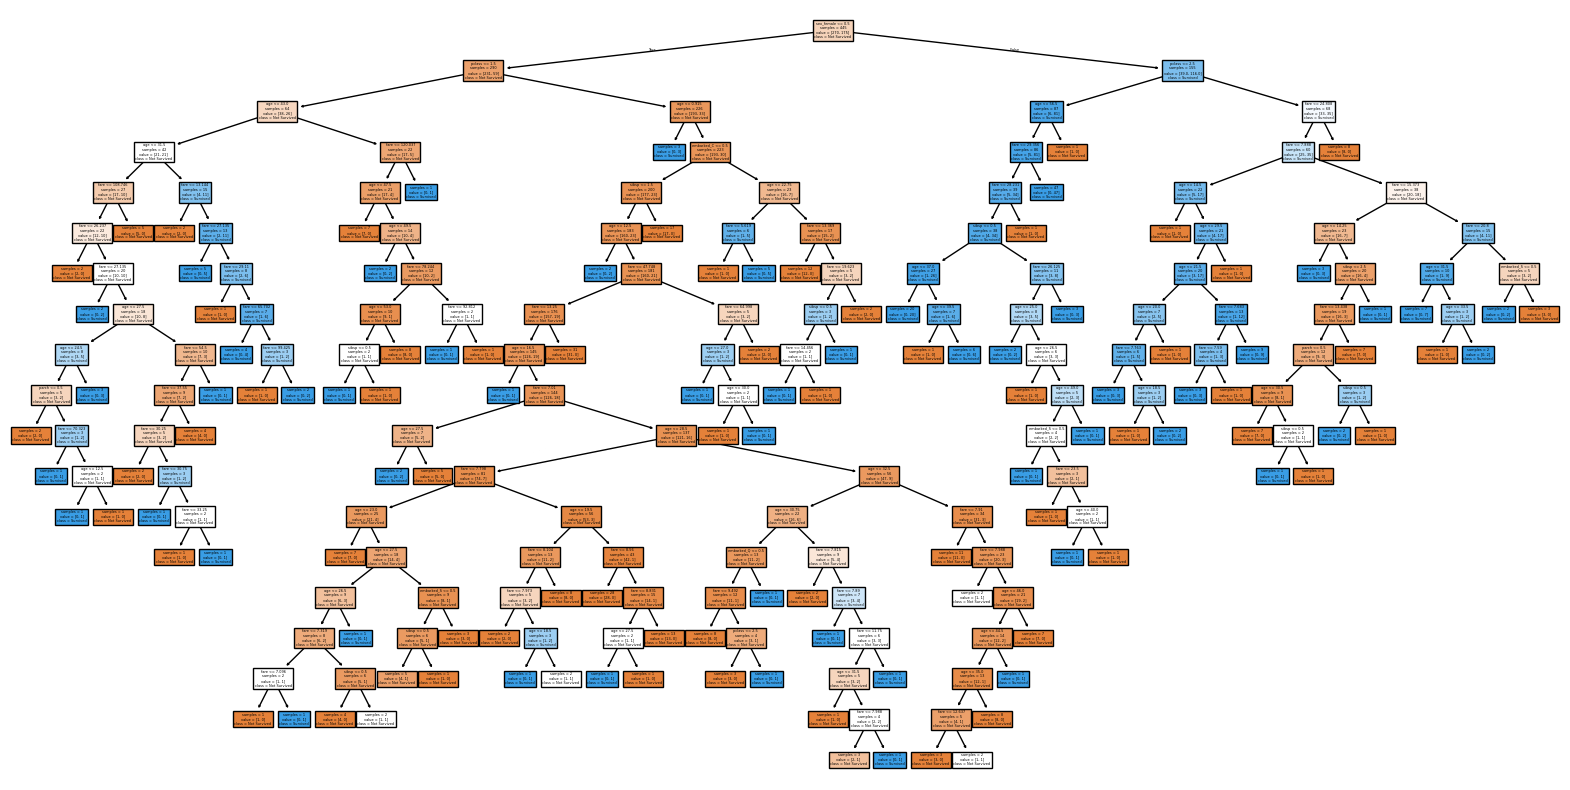

In [10]:
# Visualize tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns,
          class_names=['Not Survived', 'Survived'], impurity=False)
plt.show()

## 5) Random Forest Classifier

In [11]:
# Training Random Forest
rf_model = RandomForestClassifier(random_state=46,
                                  n_estimators=100,         # Number of trees
    max_depth=None,           # Depth of each tree
    min_samples_split=2,
    min_samples_leaf=1,
    criterion='gini')
rf_model.fit(X_train, y_train)

# Prediction
y_pred_rf = rf_model.predict(X_val)

# printing output
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))

Random Forest Accuracy: 0.8139013452914798
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       279
           1       0.78      0.71      0.74       167

    accuracy                           0.81       446
   macro avg       0.80      0.79      0.80       446
weighted avg       0.81      0.81      0.81       446



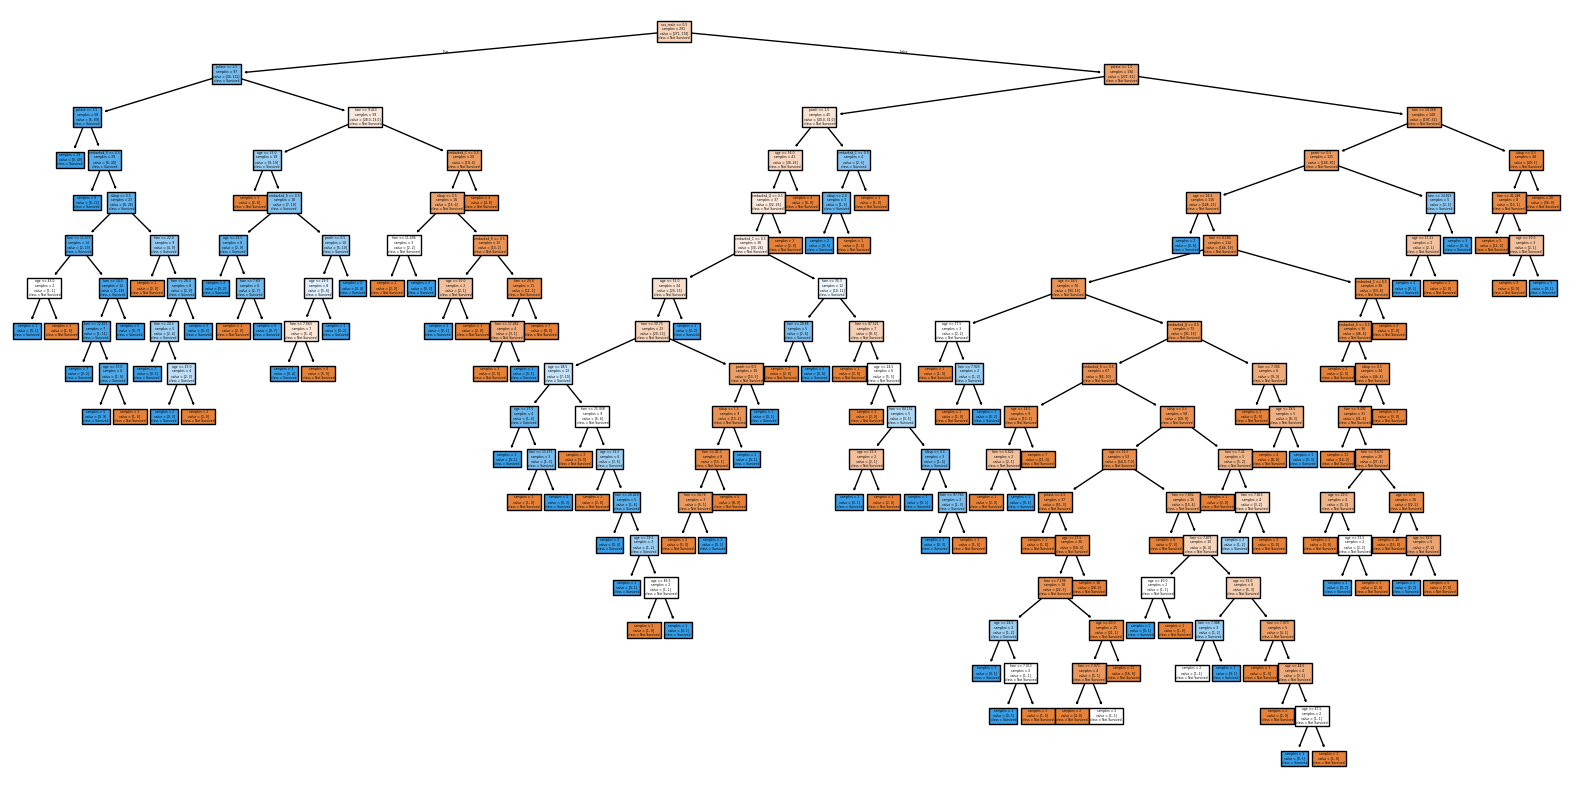

In [12]:
# Visualize tree (showing just one tree with index 1) its not possible to show all tress in random forest as it has 100
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[1], filled=True, feature_names=X_train.columns,
          class_names=['Not Survived', 'Survived'], impurity=False)
plt.show()

## 6) Confusion matrix to check model accuracy

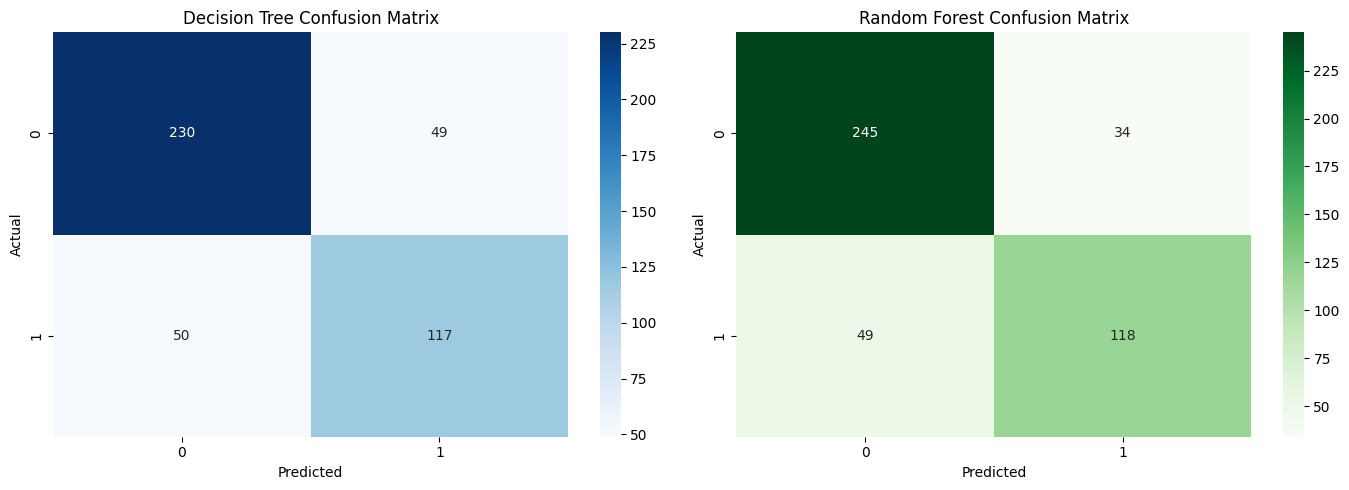

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(confusion_matrix(y_val, y_pred_dt), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

## 7) Testing models on titanic test data

In [14]:
# Make final predictions on titanic test data using Decicion Tree
final_predictions = dt_model.predict(ship_test)

# Output of the predictions
print("Predictions on titanic test data using Decision Tree:", final_predictions)

Predictions on titanic test data using Decision Tree: [0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0
 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0
 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1
 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1
 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0]


In [15]:
# Make final predictions on titanic test data using Random Forest
final_predictions = rf_model.predict(ship_test)

# Output of the predictions
print("Predictions on titanic test data using Random Forest:", final_predictions)

Predictions on titanic test data using Random Forest: [0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0
 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0
 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 1]


## 8) Insights and Conclusion
- **Random Forest** performed better overall, with higher accuracy (meaning the % of all correct predictions whether survived or not survived) and better recall(% of actual survivors correctly predicted) on survivors.
- **Decision Tree** is simpler but less robust to noise and outliers.
- Ensemble models like Random Forest often outperform individual models in real-world tasks.Meaning instead of a single decision tree , making multiple decision trees with a random subset of the data and features. This results in averaging of results and giving a better prediction. Random forest is behaving like group work which is often better than individual work in predicting.
- random_state = This introduces a seed to the predictions which can then be reproduced by others. Changing this might change the results. In decision tree it could introuce randomness only in terms of specified splits or max features.In random forest it might control the randomness by design in bootstrapping and in random selection of features. Overall it might affect results but it is always recommended to have random state to make predictions reproducible
- Confusion matrix shos values in which cases the model predicted accurately (true dead/alive to predicted dead/alive), and predicted innacurately (false dead/alive to predicted dead/alive)
